# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA2
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
31st May 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA2

### Neural Networks

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame. 
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.

### Semantic Analysis

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of  the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

> checking missing values 

> add a column to relate the sentiment to a number as ML only reads numbers

> nothing else perfomerd as data has only two columns, no missing values and its pretty straightfoward

> analyse the value column (added to match sentiment) and sentiment 

> sentiment textblob different from sentiment column already existent

> now there's neutral. It's very low, but exists. 

###### Requirements

Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the  “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm.[0-40]

Make a Prediction of a new customers income, who is not available in the original dataset [0-5]

Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]

Visualize your sentiment analysis showing the positive, neutral, and negative sentiment expressed[0-5]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Set the random seed for reproducibility
seed = 0
np.random.seed(seed)

In [4]:
# Read file
dataset = pd.read_csv("BankRecords.csv")
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
missing_value = dataset.isnull().sum()
print(missing_value)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


In [10]:
en_education = ["High School", "Degree", "Diploma", "Masters", "PhD"]
dataset["Education_OriginalEncoded"] = dataset["Education"].apply(lambda x: en_education.index(x))

        ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0        1   25                  1                   49      91107       4   
1        2   45                 19                   34      90089       3   
2        3   39                 15                   11      94720       1   
3        4   35                  9                  100      94112       1   
4        5   35                  8                   45      91330       4   
...    ...  ...                ...                  ...        ...     ...   
4995  4996   29                  3                   40      92697       1   
4996  4997   30                  4                   15      92037       4   
4997  4998   63                 39                   24      93023       2   
4998  4999   65                 40                   49      90034       3   
4999  5000   28                  4                   83      92612       3   

      Credit Score Education  Mortgage(Thousands's) Personal Lo

In [50]:
cat_col = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]
oh_en = pd.get_dummies(dataset[cat_col])
dataset = pd.concat([dataset, oh_en], axis=1)

KeyError: "None of [Index(['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',\n       'CreditCard'],\n      dtype='object')] are in the [columns]"

In [51]:
dataset

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Education_OriginalEncoded,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,1,25,1,49,91107,4,1.6,Diploma,0,2,True,False,False,True,True,False,True,False,True,False
1,2,45,19,34,90089,3,1.5,Diploma,0,2,True,False,False,True,True,False,True,False,True,False
2,3,39,15,11,94720,1,1.0,Diploma,0,2,True,False,True,False,True,False,True,False,True,False
3,4,35,9,100,94112,1,2.7,Degree,0,1,True,False,True,False,True,False,True,False,True,False
4,5,35,8,45,91330,4,1.0,Degree,0,1,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,3,True,False,True,False,True,False,False,True,True,False
4996,4997,30,4,15,92037,4,0.4,Diploma,85,2,True,False,True,False,True,False,False,True,True,False
4997,4998,63,39,24,93023,2,0.3,Masters,0,3,True,False,True,False,True,False,True,False,True,False
4998,4999,65,40,49,90034,3,0.5,Degree,0,1,True,False,True,False,True,False,False,True,True,False


In [52]:
# Drop columns after enconding to avoid redudancy 
dataset.drop(columns="Education", inplace=True)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5000 non-null   int64  
 1   Age                        5000 non-null   int64  
 2   Experience(Years)          5000 non-null   int64  
 3   Income(Thousands's)        5000 non-null   int64  
 4   Sort Code                  5000 non-null   int64  
 5   Family                     5000 non-null   int64  
 6   Credit Score               5000 non-null   float64
 7   Mortgage(Thousands's)      5000 non-null   int64  
 8   Education_OriginalEncoded  5000 non-null   int64  
 9   Personal Loan_No           5000 non-null   bool   
 10  Personal Loan_Yes          5000 non-null   bool   
 11  Securities Account_No      5000 non-null   bool   
 12  Securities Account_Yes     5000 non-null   bool   
 13  CD Account_No              5000 non-null   bool 

In [54]:
scaler = StandardScaler()

In [55]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

In [56]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\tahro\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# Fit model
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0535 - loss: 4887.5796
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2827 - loss: -0.1011
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2831 - loss: -0.6741
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2884 - loss: -1.2134
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2802 - loss: -1.7515
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2788 - loss: -2.2907
Epoch 7/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2824 - loss: -2.7293
Epoch 8/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2837 - loss: -3.2216
Epoch 9/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2839 - loss: -3.6856
Epoch 10/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2803 - loss: -4.2153
Epoch 11/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2852 - loss: -4.6448
Epoch 12/150
500/500 ━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2728 - loss: -32.8214
Epoch 68/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2699 - loss: -33.6489
Epoch 69/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2859 - loss: -33.3014
Epoch 70/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2856 - loss: -33.3904
Epoch 71/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2722 - loss: -35.0058
Epoch 72/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2700 - loss: -35.5542
Epoch 73/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2799 - loss: -35.2566
Epoch 74/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2869 - loss: -35.5381
Epoch 75/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2773 - loss: -36.5127
Epoch 76/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2745 - loss: -37.1195
Epoch 77/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2781 - loss: -37.7271
Epoch 78/150
500/500 ━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2837 - loss: -64.6497
Epoch 133/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2763 - loss: -65.6835
Epoch 134/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2791 - loss: -66.6869
Epoch 135/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2806 - loss: -66.5855
Epoch 136/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2774 - loss: -66.8275
Epoch 137/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2829 - loss: -67.2458
Epoch 138/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2783 - loss: -68.3686
Epoch 139/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2847 - loss: -67.0107
Epoch 140/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2875 - loss: -68.6898
Epoch 141/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2783 - loss: -69.0164
Epoch 142/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2832 - loss: -69.7082
Epoch 143/150

In [60]:
# Evaluate the keras model
scores = model.evaluate(X,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2796 - loss: -73.6975
compile_metrics: 28.06%


# Semantic Analysis

In [33]:
# Read file
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [35]:
# Checking missing values
missing_value = df.isnull().sum()
print(missing_value)

review       0
sentiment    0
dtype: int64


In [37]:
# Add column enumerating sentiment
df["value"] = df["sentiment"].apply(lambda x: 0 if x == "positive" else(1 if x == "negative" else "neutral"))

df.head()

,review,sentiment,value
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


<Axes: xlabel='value', ylabel='count'>

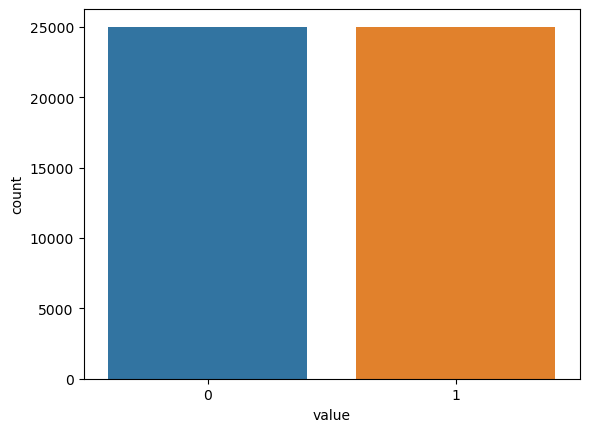

In [38]:
sns.countplot(x="value", data=df)

<Axes: xlabel='sentiment', ylabel='count'>

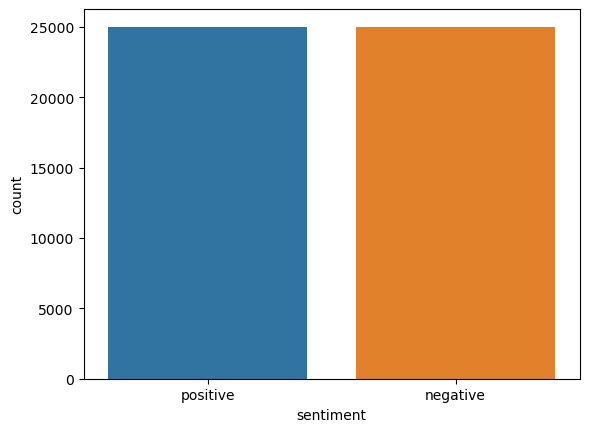

In [39]:
sns.countplot(x="sentiment", data=df)

In [51]:
from textblob import TextBlob

In [52]:
df["sentiment_score"]= df["review"].apply(lambda x:TextBlob(x).sentiment[0])

In [70]:
df["sentiment_score_textblob"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else("neutral" if x == 0 else "negative"))

In [76]:
df

,review,sentiment,value,sentiment_score,sentiment_score_textblob
0,One of the other reviewers has mentioned that ...,positive,0,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0,0.354008,positive
3,Basically there's a family where a little boy ...,negative,1,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0,0.217952,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,0,0.394425,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,-0.276190,negative
49997,I am a Catholic taught in parochial elementary...,negative,1,0.056984,positive
49998,I'm going to have to disagree with the previou...,negative,1,-0.048663,negative


<Axes: xlabel='sentiment_score_textblob', ylabel='count'>

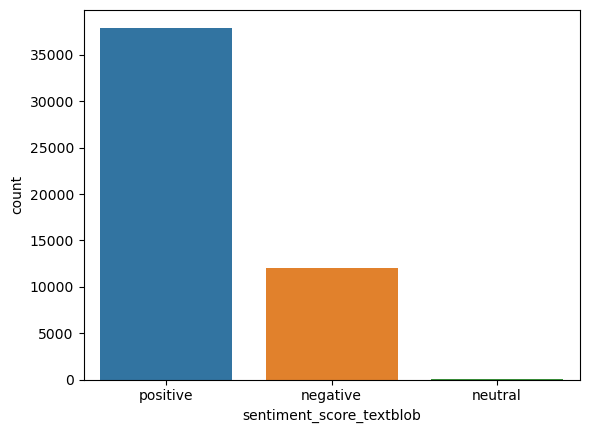

In [78]:
sns.countplot(x="sentiment_score_textblob", data=df)

# References
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Tutorial used in class 13/05

https://realpython.com/python-ai-neural-network/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Tutorial used in class 29/04